# Algorithmic Trading Strategy 

<h3> 1. We will start with a basic strategy by using rolling mean

In [75]:
import pandas as pd
import numpy as np

In [77]:
meta_data = pd.read_csv('./META.csv')

meta_data.shape

(2899, 7)

In [78]:
meta_data['MA20'] = meta_data['Close'].rolling(window=20).mean()
meta_data['MA50'] = meta_data['Close'].rolling(window=50).mean()

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN,NaN
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,NaN,NaN
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,NaN,NaN
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,NaN,NaN
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,316.178999,311.553998
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,317.476999,312.202198
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,318.698500,312.908599
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,320.796500,313.637198


In [79]:
meta_data.dropna(subset=['MA20', 'MA50'], inplace=True)

In [80]:
# Create a signal when the short-term moving average crosses the long-term moving average

meta_data['Signal'] = 0.0
meta_data['Signal'] = np.where(meta_data['MA20'] > meta_data['MA50'], 1.0, 0.0)
meta_data['Position'] = meta_data['Signal'].diff()

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,Signal,Position
49,2012-07-30,24.000000,24.040001,23.030001,23.150000,23.150000,29285900,29.238500,29.839000,0.0,NaN
50,2012-07-31,23.370001,23.370001,21.610001,21.709999,21.709999,56179400,28.785500,29.508600,0.0,0.0
51,2012-08-01,21.500000,21.580000,20.840000,20.879999,20.879999,44604400,28.269500,29.245600,0.0,0.0
52,2012-08-02,20.770000,20.840000,19.820000,20.040001,20.040001,56374500,27.698000,29.026400,0.0,0.0
53,2012-08-03,20.360001,22.160000,19.900000,21.090000,21.090000,80647000,27.166000,28.808200,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,316.178999,311.553998,1.0,0.0
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,317.476999,312.202198,1.0,0.0
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,318.698500,312.908599,1.0,0.0
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,320.796500,313.637198,1.0,0.0


In [81]:
# Calculate daily returns and strategy returns

meta_data['Market Return'] = meta_data['Close'].pct_change()
meta_data['Strategy Return'] = meta_data['Market Return'] * meta_data['Signal'].shift(1)

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,Signal,Position,Market Return,Strategy Return
49,2012-07-30,24.000000,24.040001,23.030001,23.150000,23.150000,29285900,29.238500,29.839000,0.0,NaN,NaN,NaN
50,2012-07-31,23.370001,23.370001,21.610001,21.709999,21.709999,56179400,28.785500,29.508600,0.0,0.0,-0.062203,-0.000000
51,2012-08-01,21.500000,21.580000,20.840000,20.879999,20.879999,44604400,28.269500,29.245600,0.0,0.0,-0.038231,-0.000000
52,2012-08-02,20.770000,20.840000,19.820000,20.040001,20.040001,56374500,27.698000,29.026400,0.0,0.0,-0.040230,-0.000000
53,2012-08-03,20.360001,22.160000,19.900000,21.090000,21.090000,80647000,27.166000,28.808200,0.0,0.0,0.052395,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,316.178999,311.553998,1.0,0.0,0.002543,0.002543
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,317.476999,312.202198,1.0,0.0,0.014715,0.014715
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,318.698500,312.908599,1.0,0.0,-0.008795,-0.008795
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,320.796500,313.637198,1.0,0.0,0.013384,0.013384


In [82]:
# Compute the cumulative returns for both the market and the strategy

meta_data['Cumulative Market Returns'] = (1 + meta_data['Market Return']).cumprod()
meta_data['Cumulative Strategy Returns'] = (1 + meta_data['Strategy Return']).cumprod()

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,Signal,Position,Market Return,Strategy Return,Cumulative Market Returns,Cumulative Strategy Returns
49,2012-07-30,24.000000,24.040001,23.030001,23.150000,23.150000,29285900,29.238500,29.839000,0.0,NaN,NaN,NaN,NaN,NaN
50,2012-07-31,23.370001,23.370001,21.610001,21.709999,21.709999,56179400,28.785500,29.508600,0.0,0.0,-0.062203,-0.000000,0.937797,1.000000
51,2012-08-01,21.500000,21.580000,20.840000,20.879999,20.879999,44604400,28.269500,29.245600,0.0,0.0,-0.038231,-0.000000,0.901944,1.000000
52,2012-08-02,20.770000,20.840000,19.820000,20.040001,20.040001,56374500,27.698000,29.026400,0.0,0.0,-0.040230,-0.000000,0.865659,1.000000
53,2012-08-03,20.360001,22.160000,19.900000,21.090000,21.090000,80647000,27.166000,28.808200,0.0,0.0,0.052395,0.000000,0.911015,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,316.178999,311.553998,1.0,0.0,0.002543,0.002543,14.472571,13.837339
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,317.476999,312.202198,1.0,0.0,0.014715,0.014715,14.685529,14.040950
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,318.698500,312.908599,1.0,0.0,-0.008795,-0.008795,14.556372,13.917462
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,320.796500,313.637198,1.0,0.0,0.013384,0.013384,14.751187,14.103726


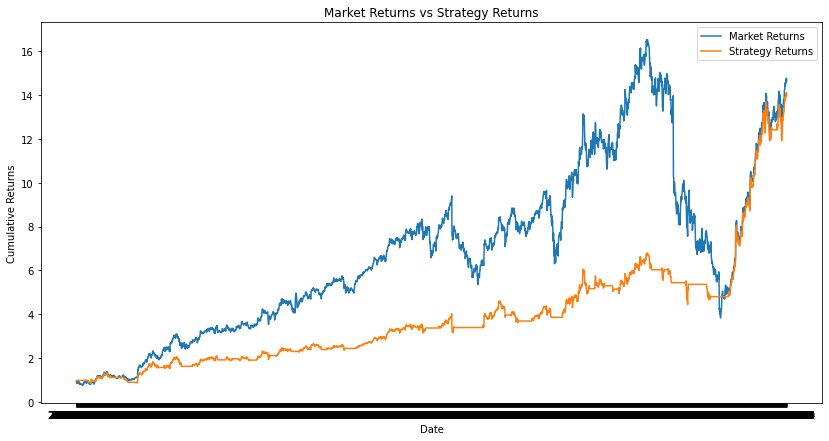

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(meta_data['Date'], meta_data['Cumulative Market Returns'], label='Market Returns')
plt.plot(meta_data['Date'], meta_data['Cumulative Strategy Returns'], label='Strategy Returns')
plt.title('Market Returns vs Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


<h3> Observations </h3>

1. Our strategy is clearly underperforming as compared to the daily returns
2. At the final stages when the market is more volatile, our strategy is stable.
3. Although our strategy is underperforming, but the risk is less as it does not go down as the stock price go down.

<h3> 2. Let's try Momentum Strategy

Steps Used:

1. Calculate the Rate of Change (ROC):<br>
    The ROC can be calculated as the percentage change in the closing price over a certain number of days (e.g., 14 days).


2. Generate Trading Signals:
    * Buy Signal: When the ROC is positive and exceeds a certain threshold, indicating upward momentum.
    * Sell Signal: When the ROC is negative or falls below a certain threshold, indicating downward momentum.


3. Backtest the Strategy:
    Apply these signals to historical data to simulate trades and calculate returns.


4. Evaluate Performance:
    Assess the strategy's performance by comparing the returns of the strategy to the market.

In [104]:
meta_data = pd.read_csv('./META.csv')

meta_data.shape

(2899, 7)

In [105]:
# Calculate the Rate of Change (ROC) - using a 14-day period
meta_data['ROC'] = meta_data['Close'].pct_change(periods=14)

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,ROC
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,NaN
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,NaN
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,NaN
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,NaN
...,...,...,...,...,...,...,...,...
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,0.106985
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,0.128456
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,0.080584
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,0.098498


In [106]:
meta_data.dropna(subset=['ROC'], inplace=True)

meta_data.shape

(2885, 8)

In [107]:
# Setting thresholds for Buy and Sell signals
buy_threshold = 0.05  # 5% increase in price
sell_threshold = -0.05  # 5% decrease in price

# Generating trading signals
meta_data['Momentum Signal'] = 0.0
meta_data['Momentum Signal'] = np.where(meta_data['ROC'] > buy_threshold, 1.0, 0.0)
meta_data['Momentum Signal'] = np.where(meta_data['ROC'] < sell_threshold, -1.0, meta_data['Momentum Signal'])

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,ROC,Momentum Signal
14,2012-06-08,26.549999,27.760000,26.440001,27.100000,27.100000,38034000,-0.291133,-1.0
15,2012-06-11,27.180000,28.070000,26.840000,27.010000,27.010000,28219600,-0.206289,-1.0
16,2012-06-12,27.480000,27.770000,26.959999,27.400000,27.400000,15816800,-0.116129,-1.0
17,2012-06-13,27.660000,28.100000,27.100000,27.270000,27.270000,17102800,-0.147813,-1.0
18,2012-06-14,27.650000,28.320000,27.379999,28.290001,28.290001,16855000,-0.143506,-1.0
...,...,...,...,...,...,...,...,...,...
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,0.106985,1.0
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,0.128456,1.0
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,0.080584,1.0
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,0.098498,1.0


In [108]:
meta_data['Market Return'] = meta_data['Close'].pct_change()

# Calculating strategy returns
meta_data['Momentum Strategy Return'] = meta_data['Market Return'] * meta_data['Momentum Signal'].shift(1)

# Cumulative returns
meta_data['Cumulative Market Returns'] = (1 + meta_data['Market Return']).cumprod()
meta_data['Cumulative Momentum Strategy Returns'] = (1 + meta_data['Momentum Strategy Return']).cumprod()

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,ROC,Momentum Signal,Market Return,Momentum Strategy Return,Cumulative Market Returns,Cumulative Momentum Strategy Returns
14,2012-06-08,26.549999,27.760000,26.440001,27.100000,27.100000,38034000,-0.291133,-1.0,NaN,NaN,NaN,NaN
15,2012-06-11,27.180000,28.070000,26.840000,27.010000,27.010000,28219600,-0.206289,-1.0,-0.003321,0.003321,0.996679,1.003321
16,2012-06-12,27.480000,27.770000,26.959999,27.400000,27.400000,15816800,-0.116129,-1.0,0.014439,-0.014439,1.011070,0.988834
17,2012-06-13,27.660000,28.100000,27.100000,27.270000,27.270000,17102800,-0.147813,-1.0,-0.004745,0.004745,1.006273,0.993526
18,2012-06-14,27.650000,28.320000,27.379999,28.290001,28.290001,16855000,-0.143506,-1.0,0.037404,-0.037404,1.043911,0.956364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,0.106985,1.0,0.002543,0.002543,12.363100,0.443088
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,0.128456,1.0,0.014715,0.014715,12.545018,0.449608
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,0.080584,1.0,-0.008795,-0.008795,12.434687,0.445654
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,0.098498,1.0,0.013384,0.013384,12.601107,0.451618


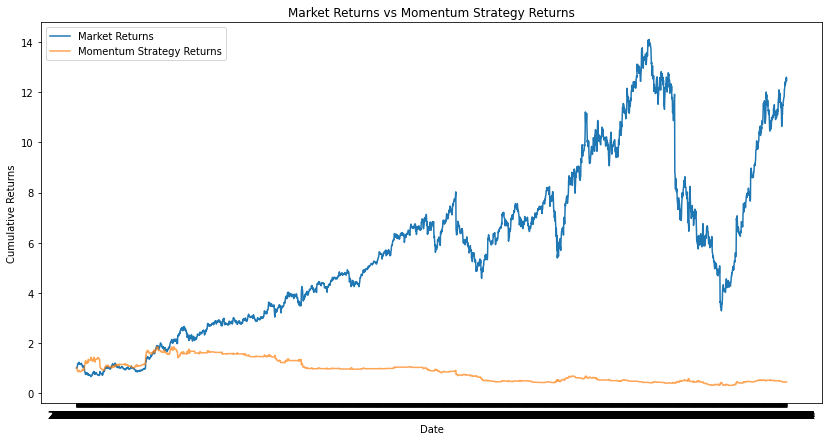

In [109]:
# Plotting the strategy returns vs market returns
plt.figure(figsize=(14, 7))
plt.plot(meta_data['Date'], meta_data['Cumulative Market Returns'], label='Market Returns')
plt.plot(meta_data['Date'], meta_data['Cumulative Momentum Strategy Returns'], label='Momentum Strategy Returns', alpha=0.7)
plt.title('Market Returns vs Momentum Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

<h3> Observations </h3>

1. Our strategy is clearly underperforming.
2. Momentum strategy is even worse than rolling mean strategy.

<h2> 3. Let's try Weighted Moving Average Strategy

Steps Used:

1. Calculate the Weighted Moving Average:
    Assign weights that decrease linearly for older prices. For instance, in a 20-day WMA, the most recent price could be multiplied by 20, the previous price by 19, and so on, down to the price 20 days ago multiplied by 1.
    The sum of these products is then divided by the sum of the weights (20 + 19 + ... + 1).
    
    
2. Generate Trading Signals:
    Similar to the simple moving average strategy, generate buy and sell signals based on the WMA. For example, a buy signal could be generated when the closing price crosses above the WMA, and a sell signal when it crosses below.
    
    
3. Backtest the Strategy:
    Apply these signals to the historical data to simulate trades and calculate returns.


4. Evaluate Performance:|
    Assess the strategy's performance by comparing the returns of the strategy to the market.

In [110]:
meta_data = pd.read_csv('./META.csv')

meta_data.shape

(2899, 7)

In [111]:
# Function to calculate Weighted Moving Average
def weighted_moving_average(data, period):
    weights = np.arange(1, period + 1)
    return data.rolling(period).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)


In [112]:
# Calculating the 20-day Weighted Moving Average (WMA)
meta_data['WMA20'] = weighted_moving_average(meta_data['Close'], 20)

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,WMA20
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,NaN
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,NaN
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,NaN
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,NaN
...,...,...,...,...,...,...,...,...
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,322.560761
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,324.826570
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,326.684000
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,328.854618


In [113]:
meta_data.dropna(subset=['WMA20'], inplace=True)

meta_data.shape

(2880, 8)

In [114]:
# Generating trading signals: buy when the Close is greater than WMA20, sell when below
meta_data['WMA Signal'] = 0.0
meta_data['WMA Signal'] = np.where(meta_data['Close'] > meta_data['WMA20'], 1.0, 0.0)
meta_data['WMA Signal'] = np.where(meta_data['Close'] < meta_data['WMA20'], -1.0, meta_data['WMA Signal'])

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,WMA20,WMA Signal
19,2012-06-15,28.510000,30.100000,28.350000,30.010000,30.010000,43563800,28.148286,1.0
20,2012-06-18,29.959999,32.080002,29.410000,31.410000,31.410000,42978900,28.342000,1.0
21,2012-06-19,31.540001,32.180000,30.700001,31.910000,31.910000,30849000,28.615810,1.0
22,2012-06-20,31.920000,31.930000,31.150000,31.600000,31.600000,15553600,28.870190,1.0
23,2012-06-21,31.670000,32.500000,31.510000,31.840000,31.840000,21875300,29.144571,1.0
...,...,...,...,...,...,...,...,...,...
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,322.560761,1.0
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,324.826570,1.0
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,326.684000,1.0
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,328.854618,1.0


In [115]:
meta_data['Market Return'] = meta_data['Close'].pct_change()

# Backtesting the strategy
meta_data['WMA Strategy Return'] = meta_data['Market Return'] * meta_data['WMA Signal'].shift(1)

# Cumulative returns
meta_data['Cumulative WMA Strategy Returns'] = (1 + meta_data['WMA Strategy Return']).cumprod()
meta_data['Cumulative Market Returns'] = (1 + meta_data['Market Return']).cumprod()

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,WMA20,WMA Signal,Market Return,WMA Strategy Return,Cumulative WMA Strategy Returns,Cumulative Market Returns
19,2012-06-15,28.510000,30.100000,28.350000,30.010000,30.010000,43563800,28.148286,1.0,NaN,NaN,NaN,NaN
20,2012-06-18,29.959999,32.080002,29.410000,31.410000,31.410000,42978900,28.342000,1.0,0.046651,0.046651,1.046651,1.046651
21,2012-06-19,31.540001,32.180000,30.700001,31.910000,31.910000,30849000,28.615810,1.0,0.015918,0.015918,1.063312,1.063312
22,2012-06-20,31.920000,31.930000,31.150000,31.600000,31.600000,15553600,28.870190,1.0,-0.009715,-0.009715,1.052982,1.052982
23,2012-06-21,31.670000,32.500000,31.510000,31.840000,31.840000,21875300,29.144571,1.0,0.007595,0.007595,1.060980,1.060980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,322.560761,1.0,0.002543,0.002543,0.155799,11.164279
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,324.826570,1.0,0.014715,0.014715,0.158092,11.328557
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,326.684000,1.0,-0.008795,-0.008795,0.156701,11.228924
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,328.854618,1.0,0.013384,0.013384,0.158798,11.379207


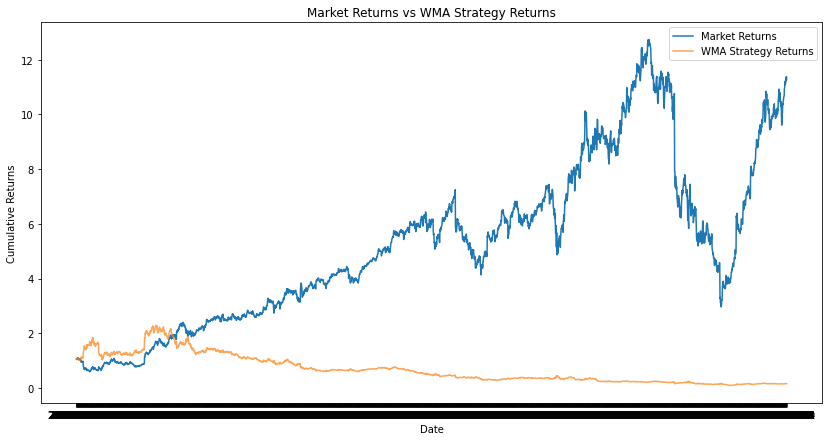

In [116]:
# Plotting the strategy returns vs market returns
plt.figure(figsize=(14, 7))
plt.plot(meta_data['Date'], meta_data['Cumulative Market Returns'], label='Market Returns')
plt.plot(meta_data['Date'], meta_data['Cumulative WMA Strategy Returns'], label='WMA Strategy Returns', alpha=0.7)
plt.title('Market Returns vs WMA Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

<h3> Observations </h3>

1. Our strategy is clearly underperforming.
2. Although it started better than the other strategies, but because of volatile nature of stocks, it clearly underperformed.

# Machine Learning Trading Strategy 

In [117]:
meta_data = pd.read_csv('./META.csv')

meta_data.shape

(2899, 7)

In [118]:
# Convert the 'Date' column to datetime if it's not already
meta_data['Date'] = pd.to_datetime(meta_data['Date'])


In [121]:
# Moving Averages
meta_data['MA20'] = meta_data['Close'].rolling(window=20).mean()
meta_data['MA50'] = meta_data['Close'].rolling(window=50).mean()

# RSI
def calculate_rsi(data, window):
    delta = data.diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    avg_gain = up.rolling(window=window).mean()
    avg_loss = down.abs().rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

meta_data['RSI'] = calculate_rsi(meta_data['Close'], 14)

meta_data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,RSI
2889,2023-11-10,319.940002,329.100006,319.459991,328.769989,328.769989,19096200,311.985999,308.050399,60.420765
2890,2023-11-13,326.200012,332.329987,325.700012,329.190002,329.190002,16908900,312.387999,308.706599,61.923192
2891,2023-11-14,334.540009,338.100006,333.329987,336.309998,336.309998,17179400,313.003499,309.429799,78.788336
2892,2023-11-15,337.929993,338.399994,330.019989,332.709991,332.709991,14531200,313.790498,310.100599,89.396043
2893,2023-11-16,329.369995,334.579987,326.380005,334.190002,334.190002,18932600,314.859499,310.810999,87.914927
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,316.178999,311.553998,86.529731
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,317.476999,312.202198,90.430394
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,318.698500,312.908599,81.201877
2897,2023-11-22,339.209991,342.920013,338.579987,341.489990,341.489990,10702700,320.796500,313.637198,84.954341
2898,2023-11-24,340.130005,341.859985,336.769989,338.230011,338.230011,5467500,323.290500,314.167399,77.267515


In [122]:
# label creation

meta_data['Future Price'] = meta_data['Close'].shift(-1)
meta_data['Price Up'] = (meta_data['Future Price'] > meta_data['Close']).astype(int)

In [123]:
meta_data.dropna(inplace=True)

meta_data

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,RSI,Future Price,Price Up
49,2012-07-30,24.000000,24.040001,23.030001,23.150000,23.150000,29285900,29.238500,29.839000,15.733115,21.709999,0
50,2012-07-31,23.370001,23.370001,21.610001,21.709999,21.709999,56179400,28.785500,29.508600,14.602446,20.879999,0
51,2012-08-01,21.500000,21.580000,20.840000,20.879999,20.879999,44604400,28.269500,29.245600,13.890909,20.040001,0
52,2012-08-02,20.770000,20.840000,19.820000,20.040001,20.040001,56374500,27.698000,29.026400,13.172416,21.090000,1
53,2012-08-03,20.360001,22.160000,19.900000,21.090000,21.090000,80647000,27.166000,28.808200,22.629965,21.920000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2893,2023-11-16,329.369995,334.579987,326.380005,334.190002,334.190002,18932600,314.859499,310.810999,87.914927,335.040009,1
2894,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,316.178999,311.553998,86.529731,339.970001,1
2895,2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500,317.476999,312.202198,90.430394,336.980011,0
2896,2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900,318.698500,312.908599,81.201877,341.489990,1


In [164]:
split_date = '2021-01-01'

train_data = meta_data[meta_data['Date'] < split_date]
test_data = meta_data[meta_data['Date'] >= split_date]

train_data.shape

(2121, 12)

In [165]:
test_data.shape

(728, 12)

In [166]:
percentage_split = train_data.shape[0]/meta_data.shape[0]

percentage_split

0.7444717444717445

<h2> EDA

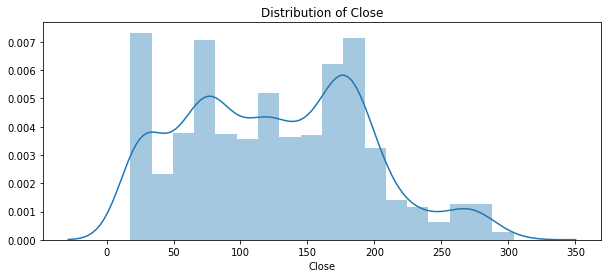

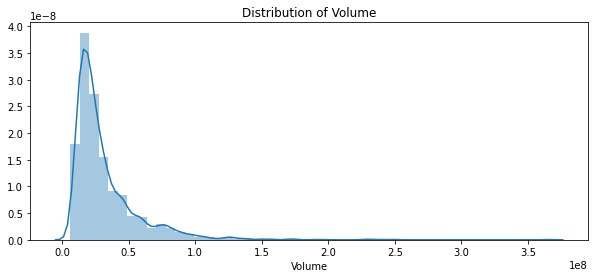

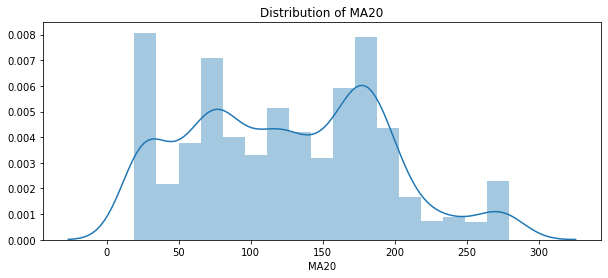

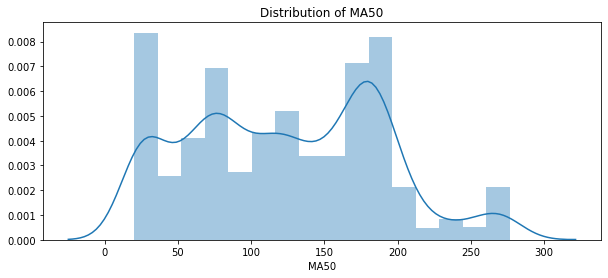

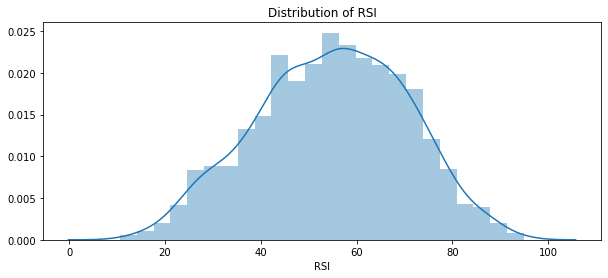

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in ['Close', 'Volume', 'MA20', 'MA50', 'RSI']:
    plt.figure(figsize=(10, 4))
    sns.distplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


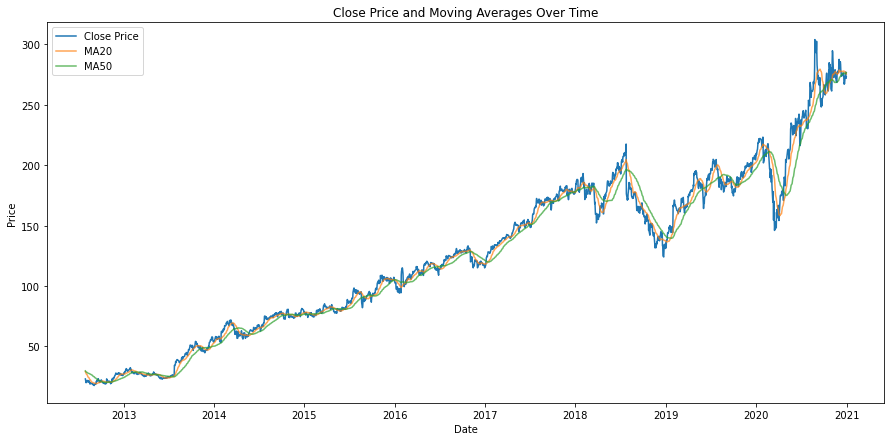

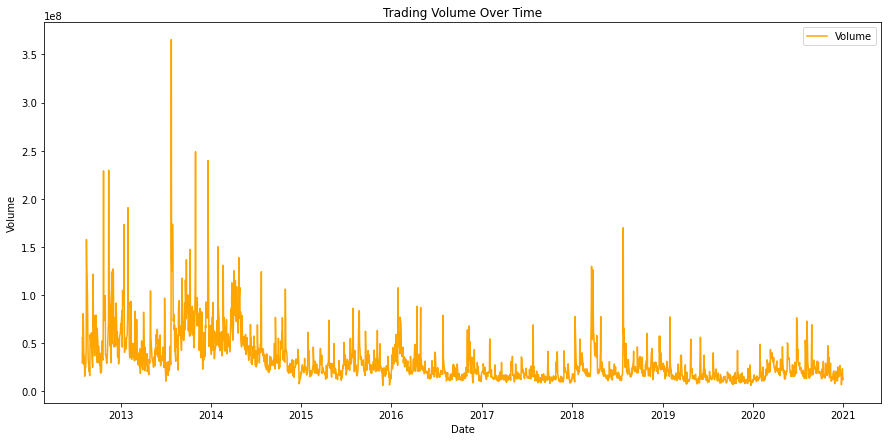

In [168]:
# Time series plot for Close price and Moving Averages
plt.figure(figsize=(15, 7))
plt.plot(train_data['Date'], train_data['Close'], label='Close Price')
plt.plot(train_data['Date'], train_data['MA20'], label='MA20', alpha=0.7)
plt.plot(train_data['Date'], train_data['MA50'], label='MA50', alpha=0.7)
plt.title('Close Price and Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Time series plot for Volume
plt.figure(figsize=(15, 7))
plt.plot(train_data['Date'], train_data['Volume'], label='Volume', color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


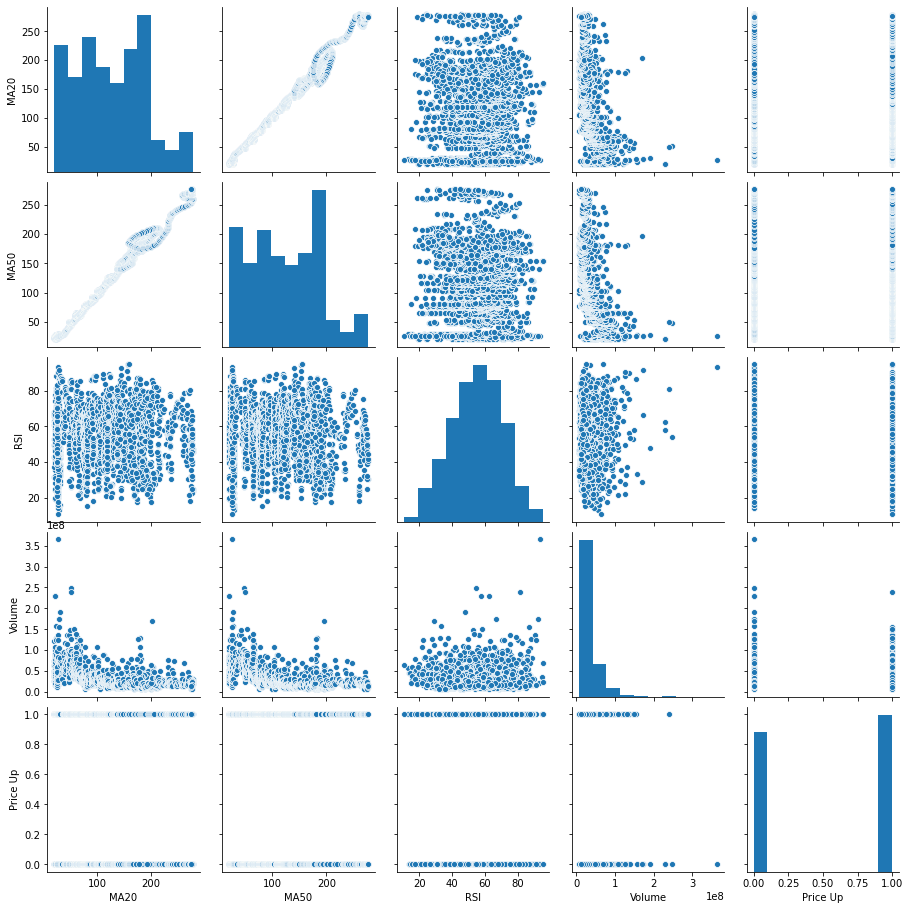

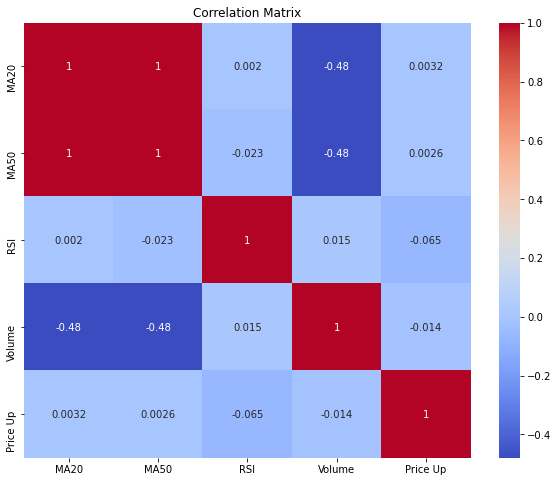

In [169]:
# Pairplot for selected features and the target
sns.pairplot(train_data[['MA20', 'MA50', 'RSI', 'Volume', 'Price Up']])
plt.show()

# Correlation heatmap
correlation = train_data[['MA20', 'MA50', 'RSI', 'Volume', 'Price Up']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


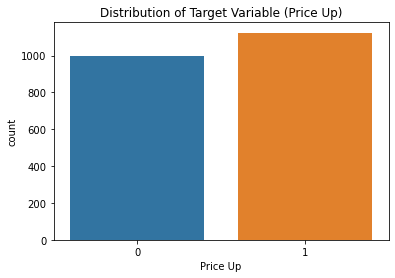

In [171]:
# check for distribution of target variable

sns.countplot(x='Price Up', data=train_data)
plt.title('Distribution of Target Variable (Price Up)')
plt.show()

In [173]:
# data scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
# Assuming X_train and X_test are already defined as per previous steps

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)


In [183]:
# Separate features and labels
# Selecting features and target
# dropping MA50 due to high correlation
features = ['MA20', 'RSI']

X_train = train[features]
y_train = train['Price Up']
X_test = test[features]
y_test = test['Price Up']

<h3> Training Machine learning Model

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Model Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.15      0.23       357
           1       0.52      0.87      0.65       371

    accuracy                           0.52       728
   macro avg       0.52      0.51      0.44       728
weighted avg       0.52      0.52      0.44       728

[[ 53 304]
 [ 47 324]]


<ipython-input-186-bca388f95c5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data_test['Strategy Return'] = meta_data_test['Close'].pct_change() * y_pred
<ipython-input-186-bca388f95c5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data_test['Cumulative Strategy Returns'] = (1 + meta_data_test['Strategy Return']).cumprod()
<ipython-input-186-bca388f95c5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

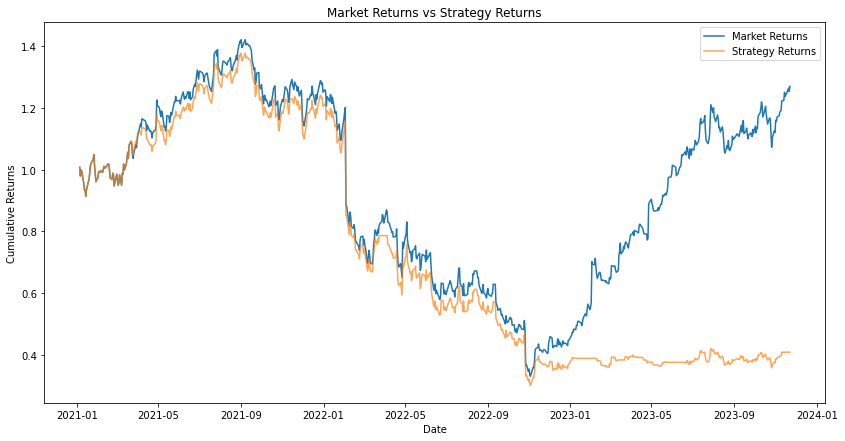

In [186]:
# Assuming 'Close' and 'Date' are in the test set
meta_data_test = meta_data[meta_data['Date'] >= split_date]
meta_data_test['Strategy Return'] = meta_data_test['Close'].pct_change() * y_pred
meta_data_test['Cumulative Strategy Returns'] = (1 + meta_data_test['Strategy Return']).cumprod()
meta_data_test['Cumulative Market Returns'] = (1 + meta_data_test['Close'].pct_change()).cumprod()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(meta_data_test['Date'], meta_data_test['Cumulative Market Returns'], label='Market Returns')
plt.plot(meta_data_test['Date'], meta_data_test['Cumulative Strategy Returns'], label='Strategy Returns', alpha=0.7)
plt.title('Market Returns vs Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

<h3> Hyper Parameter tuning

In [187]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression model
model = LogisticRegression()

# Parameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2']
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluating on the test set with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\garvs\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\users\garvs\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\garvs\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
c:\users\garvs\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\garvs\appdata\local\programs\python\python38\

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.5346603773584906
              precision    recall  f1-score   support

           0       0.53      0.15      0.23       357
           1       0.52      0.87      0.65       371

    accuracy                           0.52       728
   macro avg       0.52      0.51      0.44       728
weighted avg       0.52      0.52      0.44       728



[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.1s finished


<ipython-input-188-bca388f95c5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data_test['Strategy Return'] = meta_data_test['Close'].pct_change() * y_pred
<ipython-input-188-bca388f95c5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data_test['Cumulative Strategy Returns'] = (1 + meta_data_test['Strategy Return']).cumprod()
<ipython-input-188-bca388f95c5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

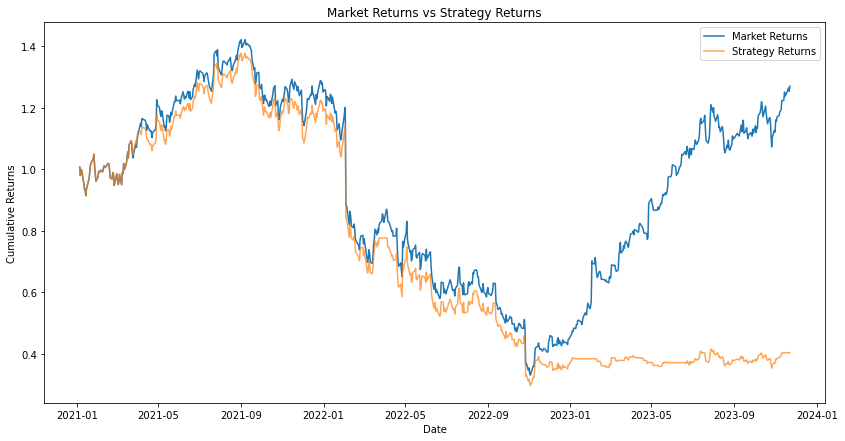

In [188]:
# Assuming 'Close' and 'Date' are in the test set
meta_data_test = meta_data[meta_data['Date'] >= split_date]
meta_data_test['Strategy Return'] = meta_data_test['Close'].pct_change() * y_pred
meta_data_test['Cumulative Strategy Returns'] = (1 + meta_data_test['Strategy Return']).cumprod()
meta_data_test['Cumulative Market Returns'] = (1 + meta_data_test['Close'].pct_change()).cumprod()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(meta_data_test['Date'], meta_data_test['Cumulative Market Returns'], label='Market Returns')
plt.plot(meta_data_test['Date'], meta_data_test['Cumulative Strategy Returns'], label='Strategy Returns', alpha=0.7)
plt.title('Market Returns vs Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

<h3> Observations </h3>

Our strategy is doing well initally but on the later stage when there is a boom in the stock price, it is not picking up.